In [1]:
%%time
import json
import inspect
import tqdm
import contractions
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
os.sys.path.insert(0,parentdir) 

import Artha
from Artha.nlp_extraction import *
import Artha.data_process as dp
import Artha.crypto_data as crypto

from datetime import datetime, timedelta

CPU times: user 2.5 s, sys: 418 ms, total: 2.92 s
Wall time: 4.37 s


In [2]:
%%time
jack_docs = run_pipeline("BTC_JackSparrow")
jack_scores = dp.tweet_df(jack_docs, "BTC")
jack_all_ticks = Counter([tick for doc in jack_docs for tick in doc._.tickers ]).most_common()
len(jack_scores)

CPU times: user 3.06 s, sys: 244 ms, total: 3.31 s
Wall time: 5.53 s


170

In [3]:
# %%time
# nostra_docs = run_pipeline("Nostranomist")
# nostra_scores = dp.tweet_df(nostra_docs, "BTC")
# nostra_all_ticks = Counter([tick for doc in nostra_docs for tick in doc._.tickers ]).most_common()

In [23]:
jack_scores.index.to_pydatetime()[0].timestamp()*1000

1618883191000.0

In [16]:


start, end = crypto.price_dates(jack_scores)
crypto.get_klines("BTCUSDT", "1h", start, end)
# jack_scores[:1].index.to_pydatetime()[0].timestamp()*1000
# print(start, end)

In [25]:
def tweet_df(docs, ticker=None, trim=True):
    tweet_scores = _get_tweet_scores(docs, ticker, trim)
    tweet_times = pd.to_datetime([i[0] for i in tweet_scores])
    return pd.Series([i[1] for i in tweet_scores],
                        index=tweet_times,
                        columns=["Sentiment"])

jack_scores = dp.tweet_df(jack_docs, "BTC")


(1618883191000.0, 1610124736000.0)

In [36]:
def _date_to_binance(date_string):
    return date_string.strftime('%d %B, %Y')[0]

_date_to_binance(jack_scores[:].index)

'19 April, 2021'

In [7]:
%%time

asset = "BTCUSDT"

tweet_scores[0][0]
klines = get_klines(asset, '1h', oldest_tweet_date, latest_tweet_date, )
df = get_klines_df(klines)

NameError: name 'tweet_scores' is not defined

In [12]:
%%time



df2 = df["Close"].reindex(pd.date_range(start=df.index.min(),
                                        end=df.index.max(),
                                        freq='T')).astype(float).interpolate(method='linear')

2628
CPU times: user 67.8 ms, sys: 20.5 ms, total: 88.3 ms
Wall time: 87.6 ms


In [ ]:
# 1) convert both to daily returns
# 2) get price at time of tweet
# 3)   look at nominal price increase

Text(0.5, 1.0, 'BTCUSDT')

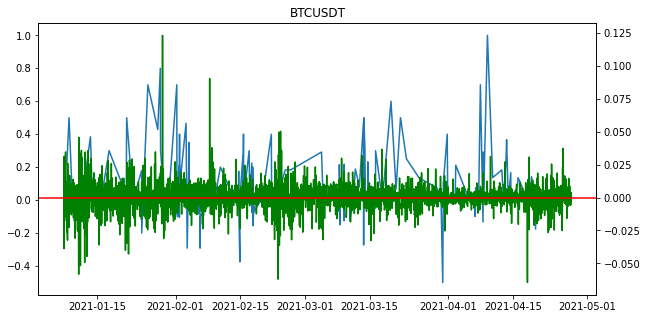

In [18]:
plt.rcParams['figure.figsize'] = [10, 5]
ts = df["Close"].astype(float).pct_change()

fig, ax1 = plt.subplots()
ax1.plot(tweet_scores_df)
# ax1.plot(ts)
ax2 = ax1.twinx()
ax2.plot(ts, color='g')
plt.axhline(y=0, color='r', linestyle='-')
plt.title(asset)

In [ ]:
# the rest of the notebook will work on all asset data

In [ ]:
all_tickers = Counter([tick for doc in docs for tick in doc._.tickers])
all_tickers.most_common(10)